# Reddit Project on Data Science

This project is to web scrape data science related information from Reddit, the social news aggregation, web content rating, and discussion website. We aim to collect general in

In [1]:
# Load necessary libraries
import praw
import pandas as pd
import PIL
from wordcloud import WordCloud
from datetime import datetime
from praw.models import MoreComments

### Reddit's Sorting Method:

Within a subreddit, there are multiple post submissions. Reddit provides us multiple ways to sort the submissions:
- rising: submissions that are getting a lot of activities (comments/upvotes) right now
- new: latest submissions by time
- hot: submissions that have been getting a lot of upvotes/comments
- gilded: comments that have been given reddit gold by someone
- controversial: submissions that have been getting multiple downvotes and upvotes. 
- top: submissions that have gotten the most upvotes over the set period 

### Authentication
First, we need to authenticate ourselves. In order to authenticate ourselves, we need to first create an app on reddit by filling in a name, description and redirect uri. After creating the app, we can use the authentication information to create the praw.Reddit instance. 

In [2]:
# we need to first authenticate ourselves
reddit = praw.Reddit(client_id='Z1grqQBW7ei7hA', client_secret='ekx286gd903s742SoxFSc7mF-kg', 
                     user_agent='simon_tutorial', redirect_uri="http://localhost:8080", username='simonneedsleep', 
                     password='ZXW1025reddit!')

# check the username
print(reddit.user.me())

simonneedsleep


### Get subreddit data
For the next step, we need to collect subreddit on data science relevant topics. The subreddits that we want to explore are r/DataScience, r/DataScienceJobs, r/MachineLearning, etc. For the moment, we will be looking at **r/DataScience** subreddit. We will collect the top 50 'hot' posts. 

In [3]:
## Scrape the DataScience subreddit
posts_ds = []
ds_subreddit = reddit.subreddit('DataScience')
#ds_subreddit = reddit.subreddit('MachineLearning')


# Obtain the hot 20 comments from the hot comments
for post in ds_subreddit.hot(limit=50):
    # convert timestamp to datetime
    posts_ds.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, datetime.fromtimestamp(post.created)])
posts_ds = pd.DataFrame(posts_ds,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

Let's take a look at the dataframe of the top 50 hot posts, sorted by score:

In [4]:
posts_ds.sort_values(by = 'score', ascending = False)

,title,score,id,subreddit,url,num_comments,body,created
1,Elon Musk has said he will demonstrate a funct...,396,igwruq,datascience,https://www.independent.co.uk/life-style/gadge...,82,,2020-08-26 15:00:14
44,UT Austin now has a Masters in DS and it looks...,183,ifoi7q,datascience,https://www.reddit.com/r/datascience/comments/...,110,[https://ms-datascience.utexas.edu/](https://m...,2020-08-24 17:00:53
12,How did you choose between focusing on statist...,165,igc2gd,datascience,https://www.reddit.com/r/datascience/comments/...,79,"And if you had a do-over, would you switch you...",2020-08-25 17:21:27
5,200+ KDD 2020 paper talks are available now wi...,127,igiywu,datascience,https://www.reddit.com/r/datascience/comments/...,3,**Here is a** [**comprehensive collection of p...,2020-08-25 23:17:04
36,Does anyone have a video of a really good data...,110,ig0ytx,datascience,https://www.reddit.com/r/datascience/comments/...,36,I wanted to see one to help plan for my project.,2020-08-25 03:54:20
3,How impressive is a Kaggle Bronze Medal as a H...,109,igpewk,datascience,https://www.reddit.com/r/datascience/comments/...,38,Basically the title: I received a Bronze medal...,2020-08-26 05:18:47
49,I had a horrific interview experience last wee...,40,ifnral,datascience,https://www.reddit.com/r/datascience/comments/...,47,Quick background: I graduated with my MS in da...,2020-08-24 16:10:27
20,Difficulty finding job after layoff. Advice ne...,36,igiyw5,datascience,https://www.reddit.com/r/datascience/comments/...,23,"Hi r/datascience, \n\nI was recently laid off ...",2020-08-25 23:17:03
33,In what types of projects would you prefer sto...,23,igahwf,datascience,https://www.reddit.com/r/datascience/comments/...,28,,2020-08-25 15:43:24
23,Sorting error caused OAS to report Bolivian el...,23,igglpi,datascience,https://cepr.net/press-release/major-coding-er...,4,,2020-08-25 21:21:13


In [ ]:
### Needs to process the title and the body as well

### also needs to plot a scatter plot between score and num_comments

### Get comments from these posts
After collecting the subreddit, we then want to get comments from a specific post. 

In [6]:
# Store the comments in a dictionary for the subreddit CHANGE the representation to df
dict_comments = {}

# Get the id of the post
keys = posts_ds.id
for key in keys:
    submission = reddit.submission(id = key)
    for top_level_comment in submission.comments:
        try:
            dict_comments[key].append(top_level_comment.body)
        except KeyError:
            dict_comments[key] = [top_level_comment.body]

In [7]:
# Flatten the dictionary to a dataframe
ds_comments_raw = pd.DataFrame(list(dict_comments.items()), columns=['ID', 'Comments'])

# Transform each element of a list-like to a row, replicating index values
ds_comments = ds_comments_raw.explode('Comments')
ds_comments_raw.head()

In [9]:
### Preprocessing
import re
## Join the list of string into one long string:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].str.join(' ')

## Remove empty space:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda x: re.sub('\s+', ' ', x))

## Convert all string to lower cases:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].str.lower()

## Remove all the punctuations:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda x: re.sub('[^\w\s]', '', x))
## need to think about the dash

## Take a look at the processed df
ds_comments_raw.head()

In [67]:
### Remove stopwords
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda text: " ".join(word for word in text.split() if word not in stop_words))

# this is the 
more_stop_words = ['uses','use','using','used','one','also','days', 'im', 'dont', 'say', 'can', 'not', 'id', 'like', 'youre', 'ive']

ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda text: " ".join(word for word in text.split() if word not in more_stop_words))

In [43]:
ds_comments_raw

,ID,Comments,Tokens
0,if1yuu,hi student bangladesh starting data science ma...,"[hi, student, bangladesh, starting, data, scie..."
1,igwruq,introducing future machinehuman interaction co...,"[introducing, future, machinehuman, interactio..."
2,ih5aya,think determining factors data science team gr...,"[think, determining, factors, data, science, t..."
3,igpewk,id say great accomplishment less placed explor...,"[id, say, great, accomplishment, less, placed,..."
4,igyd2s,theres fixed rules depends position company tr...,"[theres, fixed, rules, depends, position, comp..."
5,igiywu,remindme 2 topic screen setup please,"[remindme, 2, days, topic, screen, setup, please]"
6,ih1lnn,im south europe really able give advice uni ch...,"[d, im, south, europe, really, able, give, adv..."
7,ih5icx,1245 pm et happens comment 21 hours 20 minutes...,"[1245, pm, et, happens, comment, 21, hours, 20..."
8,igsamp,skills america could earning say usd120k year ...,"[skills, america, could, earning, say, usd120k..."
9,ih32im,normal distribution doesnt really come much re...,"[normal, distribution, doesnt, really, come, m..."


In [49]:
### tokenization
import nltk
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')

# tokenize the words
ds_comments_raw['Tokens'] = ds_comments_raw['Comments'].map(lambda x: word_tokenize(x))

In [14]:
ds_comments_raw

,ID,Comments,Tokens
0,if1yuu,hi student bangladesh starting data science ma...,"[hi, student, bangladesh, starting, data, scie..."
1,igwruq,introducing future machinehuman interaction co...,"[introducing, future, machinehuman, interactio..."
2,ih5aya,think determining factors data science team gr...,"[think, determining, factors, data, science, t..."
3,igpewk,id say great accomplishment less placed explor...,"[id, say, great, accomplishment, less, placed,..."
4,igyd2s,theres fixed rules depends position company tr...,"[theres, fixed, rules, depends, position, comp..."
5,igiywu,remindme 2 days topic screen setup please,"[remindme, 2, days, topic, screen, setup, please]"
6,ih1lnn,d im south europe really able give advice uni ...,"[d, im, south, europe, really, able, give, adv..."
7,ih5icx,1245 pm et happens comment 21 hours 20 minutes...,"[1245, pm, et, happens, comment, 21, hours, 20..."
8,igsamp,skills america could earning say usd120k year ...,"[skills, america, could, earning, say, usd120k..."
9,ih32im,normal distribution doesnt really come much re...,"[normal, distribution, doesnt, really, come, m..."


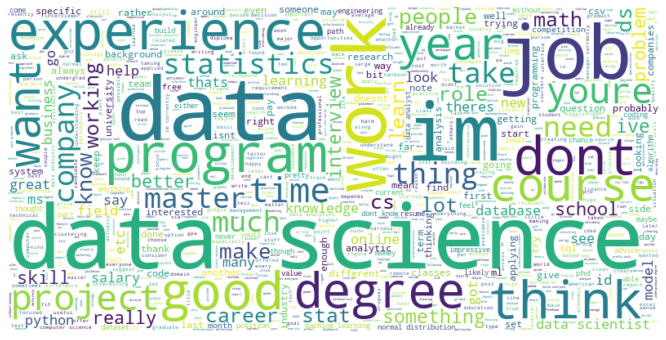

In [15]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height = 400)
# generate word cloud
wc.generate(' '.join(ds_comments_raw['Comments']))
#wc.generate(' '.join(ds_comments_raw['Tokens']))

import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from textblob import TextBlob
TextBlob(ds_comments_raw['Comments'][0]).ngrams(2)

[WordList(['hi', 'student']),
 WordList(['student', 'bangladesh']),
 WordList(['bangladesh', 'starting']),
 WordList(['starting', 'data']),
 WordList(['data', 'science']),
 WordList(['science', 'major']),
 WordList(['major', 'university']),
 WordList(['university', 'texas']),
 WordList(['texas', 'dallas']),
 WordList(['dallas', 'passionate']),
 WordList(['passionate', 'data']),
 WordList(['data', 'science']),
 WordList(['science', 'selected']),
 WordList(['selected', 'major']),
 WordList(['major', 'barely']),
 WordList(['barely', 'second']),
 WordList(['second', 'thought']),
 WordList(['thought', 'eerie']),
 WordList(['eerie', 'feeling']),
 WordList(['feeling', 'might']),
 WordList(['might', 'taken']),
 WordList(['taken', 'bold']),
 WordList(['bold', 'decision']),
 WordList(['decision', 'taking']),
 WordList(['taking', 'cs']),
 WordList(['cs', 'could']),
 WordList(['could', 'safer']),
 WordList(['safer', 'bet']),
 WordList(['bet', 'afterwards']),
 WordList(['afterwards', 'focusing']),


In [56]:
## work frequency by post
from nltk.probability import FreqDist # this also uses Counter. 
for i in range(ds_comments_raw.shape[0]):
    print(FreqDist(ds_comments_raw['Tokens'][i]).most_common(5))

[('data', 154), ('science', 66), ('work', 28), ('like', 27), ('degree', 26)]
[('signals', 5), ('brain', 4), ('pump', 4), ('electric', 4), ('earing', 4)]
[('data', 6), ('scrum', 5), ('science', 4), ('need', 4), ('allow', 4)]
[('impressive', 12), ('competition', 8), ('kaggle', 7), ('people', 6), ('learning', 5)]
[('data', 8), ('code', 5), ('science', 4), ('coding', 4), ('depends', 3)]
[('remindme', 1), ('2', 1), ('topic', 1), ('screen', 1), ('setup', 1)]
[('science', 6), ('math', 5), ('data', 5), ('programs', 4), ('2', 3)]
[('pm', 3), ('1245', 2), ('comment', 2), ('send', 2), ('et', 1)]
[('salary', 23), ('would', 12), ('company', 12), ('think', 10), ('work', 10)]
[('normal', 21), ('distribution', 21), ('data', 8), ('average', 5), ('much', 3)]
[('statistics', 25), ('cs', 21), ('stats', 13), ('science', 12), ('math', 11)]
[('good', 2), ('udemy', 2), ('like', 2), ('lot', 2), ('place', 1)]
[('httpssnapstanfordedudatahttpssnapstanfordedudata', 1)]
[('free', 4), ('certified', 3), ('data', 3), 

In [68]:
from nltk.probability import FreqDist # this also uses Counter. 


print(FreqDist(' '.join(ds_comments_raw['Comments']).split()).most_common(50))
#' '.join(ds_comments_raw['Comments']).split()

[('data', 270), ('science', 124), ('would', 83), ('work', 73), ('get', 72), ('experience', 61), ('good', 60), ('job', 59), ('think', 59), ('degree', 54), ('know', 54), ('want', 51), ('much', 48), ('statistics', 46), ('masters', 44), ('time', 44), ('company', 44), ('program', 42), ('people', 41), ('need', 40), ('learning', 40), ('could', 39), ('ds', 39), ('career', 38), ('analytics', 38), ('working', 37), ('take', 37), ('learn', 37), ('cs', 36), ('make', 36), ('something', 34), ('math', 34), ('stats', 33), ('courses', 32), ('really', 32), ('better', 32), ('lot', 32), ('go', 31), ('years', 29), ('projects', 28), ('business', 28), ('school', 28), ('python', 27), ('2', 27), ('see', 27), ('1', 27), ('new', 26), ('online', 25), ('etc', 25), ('many', 25)]


In [55]:
# Get the frequency of bigrams
from nltk.collocations import BigramCollocationFinder

text = ' '.join(ds_comments_raw['Comments'])
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(text))
    
for k,v in sorted(finder.ngram_fd.items(), key=lambda item: item[1], reverse=True):
    if v > 2:
        print(k, v)

('data', 'science') 106
('data', 'scientist') 23
('machine', 'learning') 14
('normal', 'distribution') 14
('data', 'analyst') 12
('computer', 'science') 12
('data', 'analytics') 11
('data', 'analysis') 9
('work', 'experience') 6
('data', 'scientists') 6
('business', 'analytics') 6
('working', 'data') 5
('hi', 'everyone') 5
('georgia', 'tech') 5
('want', 'go') 5
('math', 'statistics') 5
('would', 'suggest') 5
('make', 'sure') 5
('pretty', 'much') 5
('cs', 'stats') 5
('want', 'work') 5
('masters', 'degree') 4
('can', 'not') 4
('hello', 'everyone') 4
('2', 'years') 4
('career', 'data') 4
('online', 'courses') 4
('science', 'program') 4
('work', 'data') 4
('post', 'graduate') 4
('undergraduate', 'degree') 4
('go', 'back') 4
('comp', 'sci') 4
('pretty', 'good') 4
('masters', 'data') 4
('job', 'market') 4
('software', 'engineering') 4
('10', 'years') 4
('electric', 'signals') 4
('want', 'know') 4
('ms', 'statistics') 4
('linear', 'algebra') 4
('ms', 'business') 4
('csv', 'files') 4
('ut', 'a

In [ ]:
#dir(BigramCollocationFinder.ngram_fd)

In [19]:
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

Short answer: no. You didn’t ruin your chance of getting into something else. A PhD specializes you, but it also teaches you to think critically, research a problem and look at it differently to come up with a unique solution that isn’t otherwise apparent. 

I think a better question is what do you want with your career?  Want to work in academia or industry?  Shape your classes around what you want to do. 

It’s one internship and one interview. Don’t sweat it. If you still have an internship, prove to them that you are smart enough to solve their problem and learn as much as you can.  You got this.
First, don't take it too hard. It was a single interview so don't deduce too much.

I think it was an unpleasant experience due to both sides. There is plenty of work in NLP and even if you go to unfamiliar area, do some homework before. You will have to pass a technical interview.  


From the company side, throwing terms at the candidate is a very strange method. An experienced interview

### Data Exploration
- Look for the keywords, such as bootcamp, masters, program, learn (lectures), certified
- Build a wordcloud
- Top frequency
- n-grams (bi-gram: exponentially increases in your sample size)
- Look for stopwords (equivalent proxies, mooc)
- Look for new Data Science jobs (especially from the DataScienceJobs, or other related website)

#### What to look for?
- Look for the information to help with the models (what terms may signify the topics)
- How to extract topics? Manual label (regex)
- highly voted? highly response to? time series response? weekly hot? To reinforce the topics? No. comments.
- Think for how would I find information manually. And then automate it. 

In [ ]:
# Using spacy to process the comments
import spacy
nlp = spacy.load('en_core_web_sm')
example_doc = nlp(example_comment)

In [ ]:
for token in example_doc:
    if not token.is_stop and not token.is_punct:
        print(token)

In [ ]:
### put this into a function
from collections import Counter
# Remove stop words and punctuation symbols
words = [token.text for token in example_doc
       if not token.is_stop and not token.is_punct]

word_freq = Counter(words)

# 5 commonly occuring words with their frequencies
common_words = word_freq.most_common(5)
print(common_words)

# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
#print(unique_words)

In [ ]:
# Extract Noun Phrases
for chunk in example_doc.noun_chunks:
    print(chunk)

In [ ]:
for ent in example_doc.ents:
    print(ent.text, ent.start_char, ent.end_char,
         ent.label_, spacy.explain(ent.label_))

get a list of tokens. join every single comment together to a string. that's the corpus. str.split(). frequency distribution. Go for the bi-gram/unigram! 

what are things occured in relation to others. what grams appear in the same line with others. 
nltk. what terms occur with each other. statistical analysis with market basket analysis. the lift, support and confidence. NLP version. 

In [ ]:
from nltk.probability import FreqDist # this also uses Counter. 
list_A = ['list', 'form', 'list', 'A', 'B']
FreqDist(list_A).most_common(2)

### Models (NLP)
- Topic detection
- Text classification

### Create a Job Posting Database (Reddit, Linkedin, Indeed, etc)
- Web scrape websites such as Reddit, Linkedin, Indeed for job posts related to data science
- Analyze the job description and requirements
- Create a database for the job posts

### Create a database to store the reddits

project, we have gathered some interesting findings. Initial objectives 

first component: technical work done. what kind of information. 3-4 slides

Here are some findings: 3-4 slides

some bar charts: the distribution charts.

Visuals: put on the slides